<div>
  <center><h1>Exploring the structure of game sales data, user and experience scores, genres and platforms</h1></center>
</div>

# Content
1. [Data description](#Data_description)
2. [Learning General Information](#Learning_General_Information)
4. [Data_Preprocessing](#Data_Preprocessing)
6. [Исследовательский анализ данных](#Исследовательский_анализ_данных) 
7. [Вывод по исследовательскому анализу данных](#Вывод_по_исследовательскому_анализу_данных)
8. [Портрет пользователя каждого региона](#Портрет_пользователя_каждого_региона)
9. [Вывод по исследовательскому анализу данных](#Вывод_по_исследовательскому_анализу_данных)
10. [Проверка гипотез](#Проверка_гипотез)
11. [Вывод по проверке гипотез](#Вывод_по_проверке_гипотез)
12. [Общий_вывод](#Общий_вывод)

<div><a name="Learning_General_Informatio"><h2>Learning General Information</h2></a></div>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
pth1 = '/datasets/games.csv'
pth2 = 'games.csv'


if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
   print('Something is wrong')

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div><p>
When reviewing the data found:
     <br> - a large number of missing values.
     <br> - "User_Score" column must be of float64 type.
     <br> - incorrect column names.
     <br> - incorrect number type in column "Year_of_Release"       
</p></div> 

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
data.duplicated().sum()

0

<div>
<br> When studying this table, quite a lot of missing values ​​and incorrect column names were found.
     Perhaps this is due to an error in the manual entry of information by a person,
     either critics and users did not rate the game.
     We can also safely delete the lines without the name of the games (why do we need information about the game,
     whose name is unknown). Found that column "User_Score" should be of type float64 and incorrect number type in column "Year_of_Release". No duplicates were found in the table.
</div> 


<div><a name="Data_Preprocessing"><h2>Data Preprocessing</h2></a></div>

In [8]:
#rename columns
data.columns = data.columns.str.lower()

In [9]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
#remove the lines where the name of the game is missing
data = data.dropna(subset=['name'])

<div><p>
Gaps in the "year_of_release" column cannot be filled with mean/median values, these data are not the most important for data analysis. Let's replace the gaps with 2077 so that this data differs from the others.
</p></div>

In [11]:
#change column type "year_of_release"
data['year_of_release'] = data['year_of_release'].fillna(2077)
data['year_of_release'] = data['year_of_release'].astype(int)

In [12]:
data['year_of_release'] = data['year_of_release'].astype(str)
data['simple'] = '-01-01'

In [13]:
data['year'] = data['year_of_release'] + data['simple']

In [14]:
data['year'] = pd.to_datetime(data['year'], format="%Y-%m-%dT%H:%M:%S")


In [15]:
data['year'] = data['year'].dt.year

In [16]:
del data['simple']
del data['year_of_release']

<div><p>
Fill in the gaps in the "user_score" column.
</p></div>

In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

<div><p>
The 'tbd' rating is an abbreviation of To Be Determined (to be determined) or To Be Decided (to be decided). It follows that the rating is still unknown, i.e. replacing 'tbd' with -1 so as not to mix games with truly zero ratings. 'nan' will also be replaced by -1. 
</p></div> 

In [18]:
data['user_score'] = data['user_score'].replace('tbd', -1)
data['user_score'] = data['user_score'].replace(np.nan, -1)

In [19]:
data['user_score'] = data['user_score'].astype(float)

<div><p>
Let's fill in the gaps in the "critic_score" column.</p></div>

<div><p>
Replacing nan with -1, as in the 'user_score' column
</p></div>

In [20]:
data['critic_score'] = data['critic_score'].replace(np.nan, -1)

<div><p>
In the "critic_score" column, let's replace the data type with int, because all numbers are integers.
</p></div> 

In [21]:
data['critic_score'] = data['critic_score'].astype(int)

<div><p>
In the "rating" column, replace nan with RP, because most likely the ESRB did not assign the final rating to the games. 
</p></div> 

In [22]:
data['rating'] = data['rating'].replace(np.nan, 'RP')

In [23]:
data['rating'].value_counts()

RP      6767
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

In [24]:
data = data[(data['rating'] != 'AO') & (data['rating'] != 'K-A') & (data['rating'] != 'EC')]
data

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,76,8.0,E,2006
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,-1,-1.0,RP,1985
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,82,8.3,E,2008
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,80,8.0,E,2009
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,RP,1996
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,-1,-1.0,RP,2016
16711,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,-1,-1.0,RP,2006
16712,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,RP,2016
16713,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,-1,-1.0,RP,2003


In [25]:
data['rating'].unique()

array(['E', 'RP', 'M', 'T', 'E10+'], dtype=object)

<div><p>
Let's calculate the total sales in all regions in a separate column 'sales'.
</p></div> 

In [26]:
data['sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [27]:
data

,name,platform,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,sales
0,Wii Sports,Wii,Sports,41.36,28.96,3.77,8.45,76,8.0,E,2006,82.54
1,Super Mario Bros.,NES,Platform,29.08,3.58,6.81,0.77,-1,-1.0,RP,1985,40.24
2,Mario Kart Wii,Wii,Racing,15.68,12.76,3.79,3.29,82,8.3,E,2008,35.52
3,Wii Sports Resort,Wii,Sports,15.61,10.93,3.28,2.95,80,8.0,E,2009,32.77
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,RP,1996,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,Action,0.00,0.00,0.01,0.00,-1,-1.0,RP,2016,0.01
16711,LMA Manager 2007,X360,Sports,0.00,0.01,0.00,0.00,-1,-1.0,RP,2006,0.01
16712,Haitaka no Psychedelica,PSV,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,RP,2016,0.01
16713,Spirits & Spells,GBA,Platform,0.01,0.00,0.00,0.00,-1,-1.0,RP,2003,0.01


<div>
<br> All gaps are filled in the table. Removed rows with missing game titles and categories that have low sales. Replaced data type in "critic_score" and "user_score" columns. Added new columns 'sales' (in which the total sale of games is calculated) and 'ear'.</div> 

<div><a name="Exploratory_Data_Analysis"><h2>Exploratory Data Analysis</h2></a></div>

<div><p>
Let's see how many games were released in different years.</p></div>

In [1]:
sns.histplot(data['year'])
plt.xlim(1980, 2018)
plt.title('Fig. 1 Number of games by year')
plt.xlabel('Year of issue')
plt.ylabel('Number of released games')
plt.show()

NameError: name 'sns' is not defined

<div><p>
<br>
    - Fig. 1 shows that since the beginning of the 90s, the number of games has been growing rapidly every year. You can try to explain this by the development of computers: the widespread use of CD-ROM for distribution and storage of data, the spread of operating systems such as Microsoft Windows and Mac OS. Game consoles such as Nintendo, Playstation, and later XBOX gradually gained popularity. This growth continues until 2008.
<br> - In the late 90s, the growing speed of Internet access made it possible for the browser to become an independent gaming platform. In the middle of the 2000s, the exponential growth of social networks begins, which become a new way of communication between people. Game developers now simply cannot ignore the browser platform and a separate platform and games for it stand out inside it. All this, plus the emergence of iOS and Android mobile platforms just at the turn of 2008, contributed to a partial shift in emphasis in favor of mobile applications and mobile games. From here you can see a sharp decline in console games, starting from 2009 to 2016.</p></div> 

<div><p>
Let's see how sales changed by platform. Let's choose the platforms with the highest total sales and plot the distribution by years.</p></div>

Text(0, 0.5, 'Количество продаж')

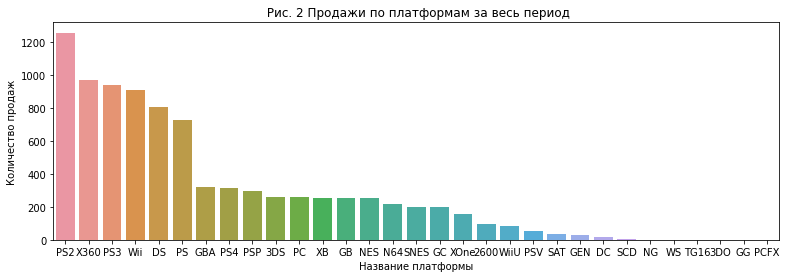

In [29]:
sales_on_platforms= data.pivot_table(index='platform', values='sales', aggfunc='sum').sort_values(
    by='sales', ascending=False)

plt.figure(figsize=(13,4))
sns.barplot(x=sales_on_platforms.index,y=sales_on_platforms['sales'])
plt.title(" Fig. 2 Sales by platform for the entire period")
plt.xlabel("Platform name")
plt.ylabel("Number of sales")

<div><p>
Fig. 2 shows that the most popular gaming platforms for the entire period are PS2, X360, PS3, WII, DS, PS. </p></div> 


In [30]:
platform_grouped = sales_on_platforms.reset_index()


In [31]:
platforms_list = platform_grouped['platform'].unique()
platforms_list

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP',
       '3DS', 'PC', 'XB', 'GB', 'NES', 'N64', 'SNES', 'GC', 'XOne',
       '2600', 'WiiU', 'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS',
       'TG16', '3DO', 'GG', 'PCFX'], dtype=object)

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


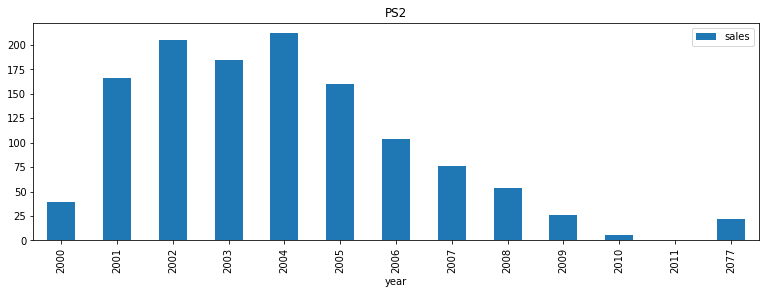

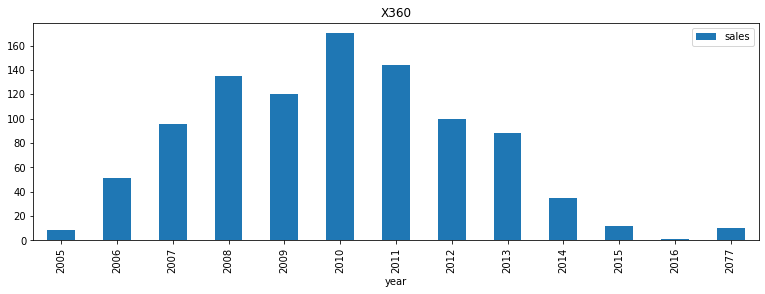

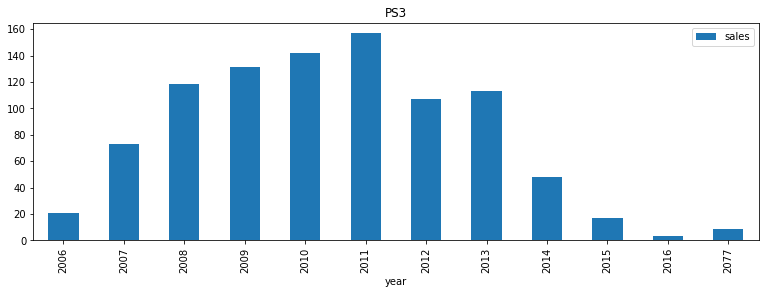

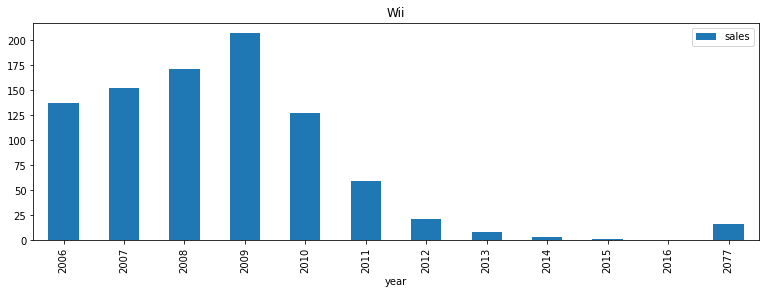

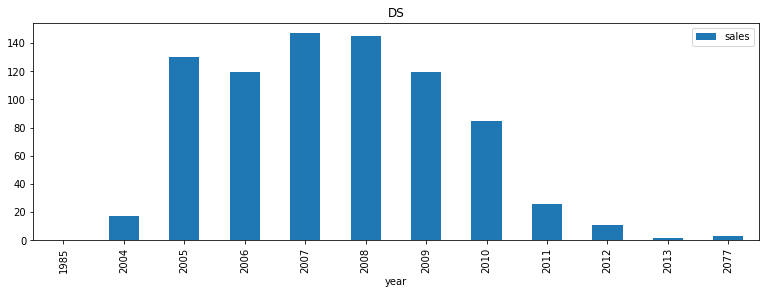

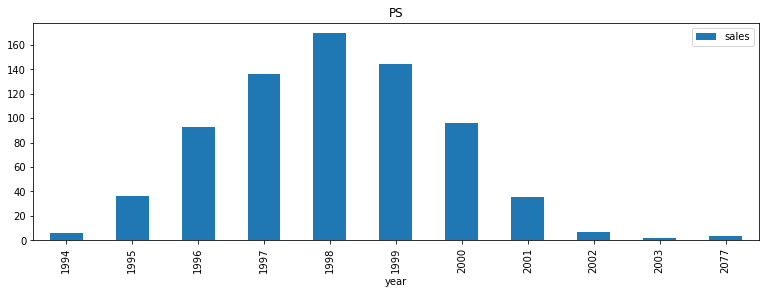

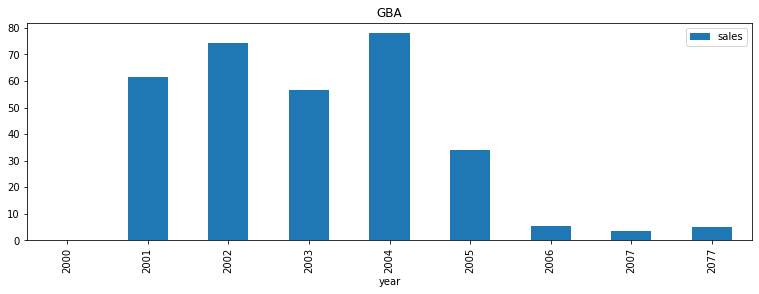

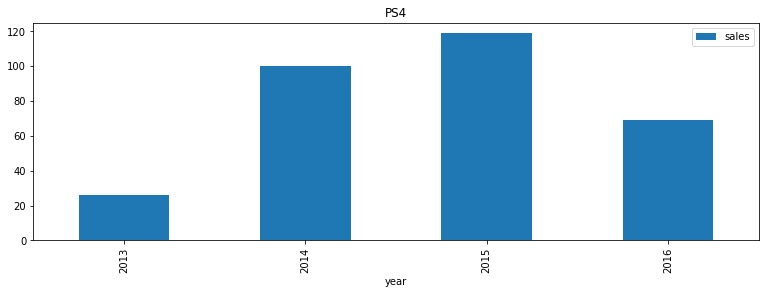

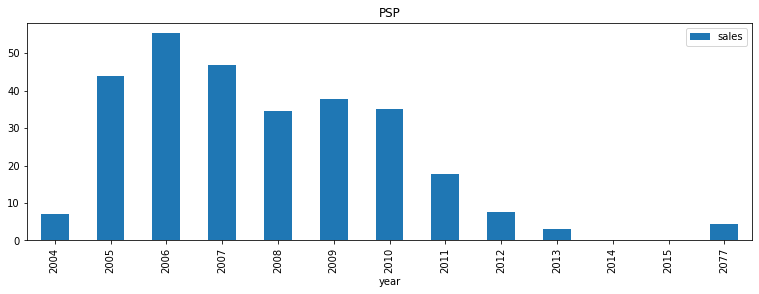

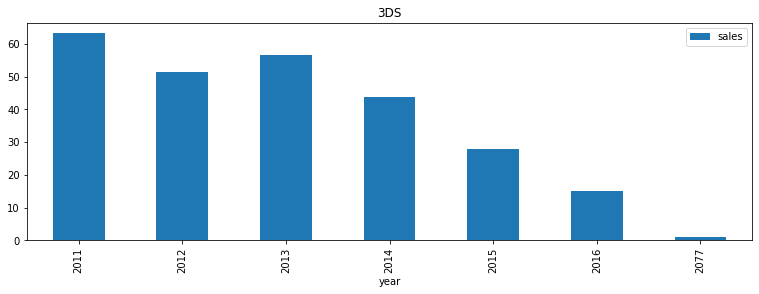

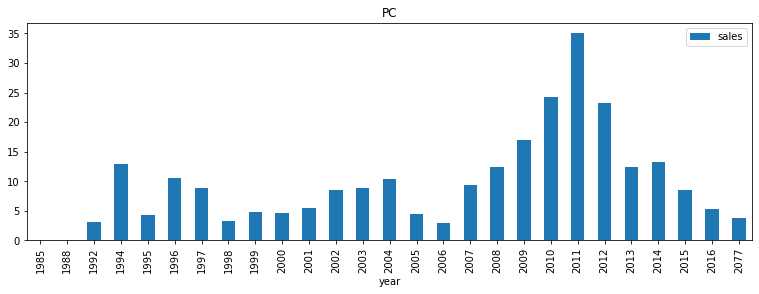

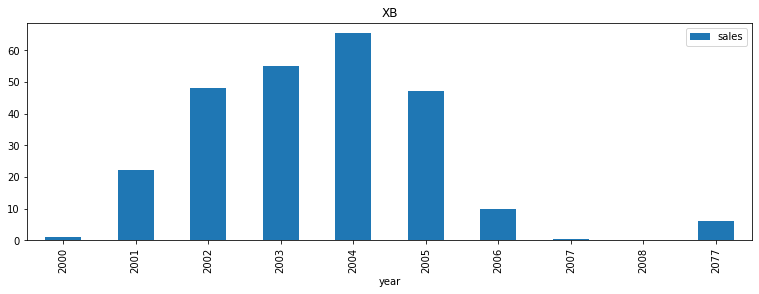

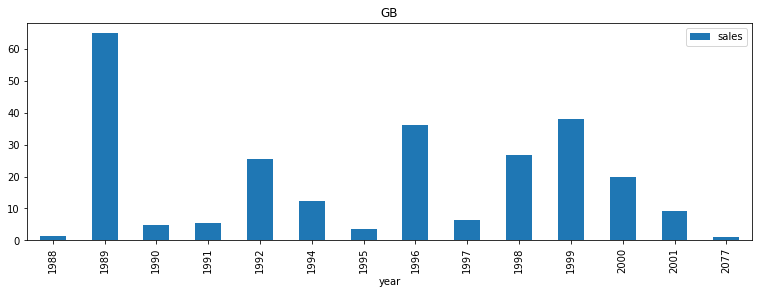

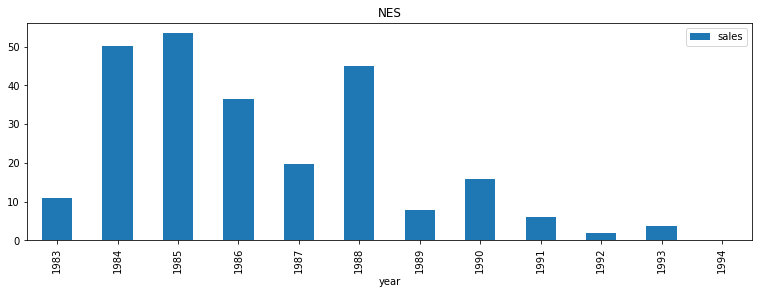

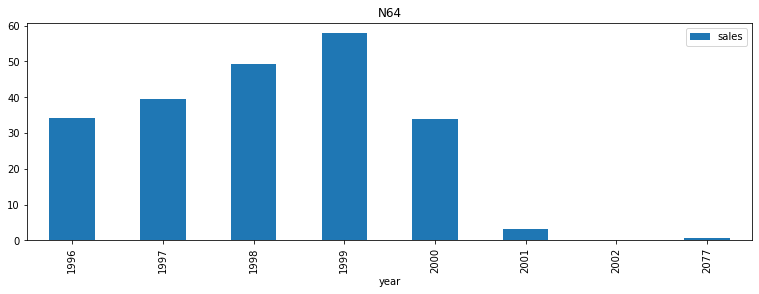

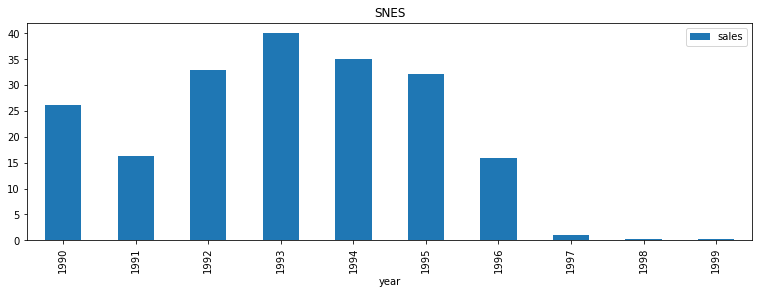

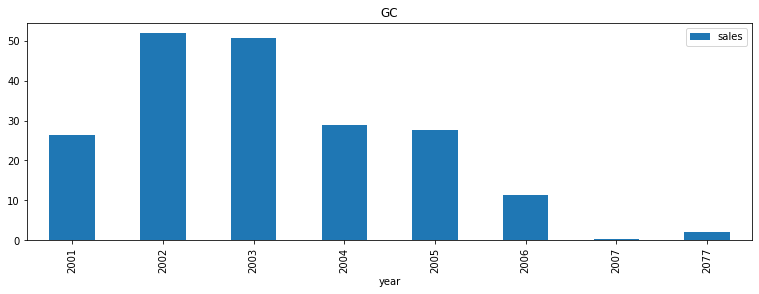

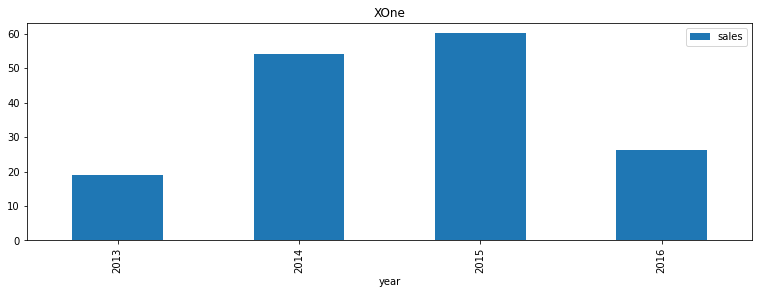

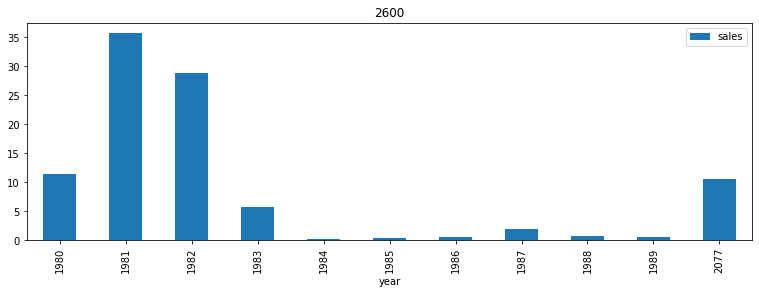

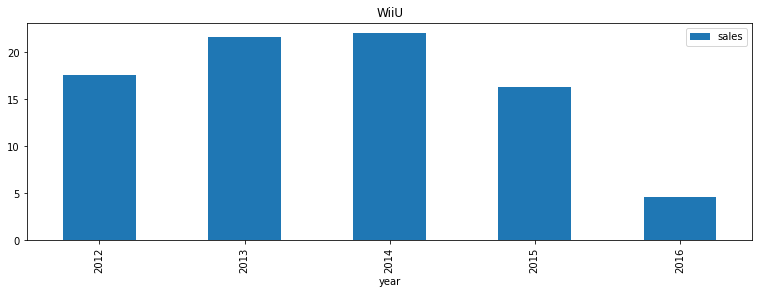

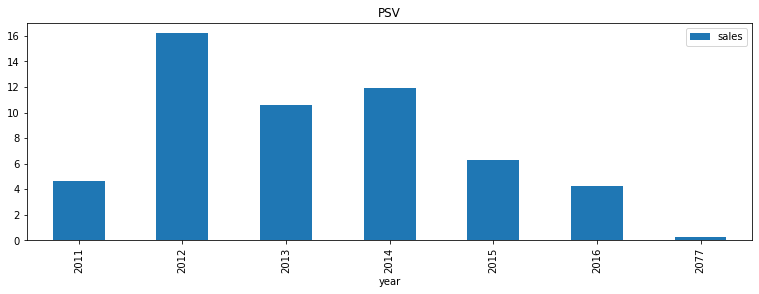

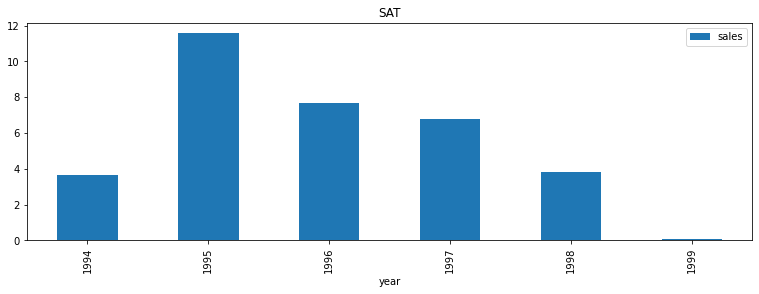

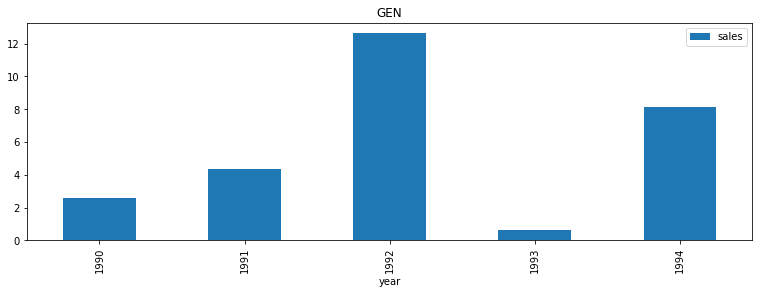

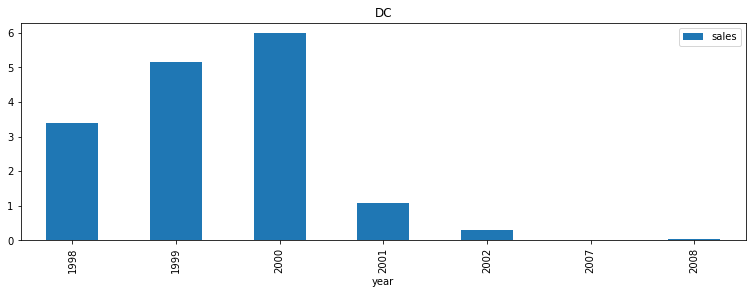

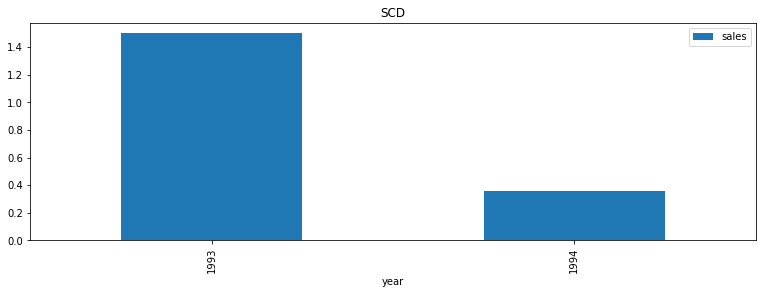

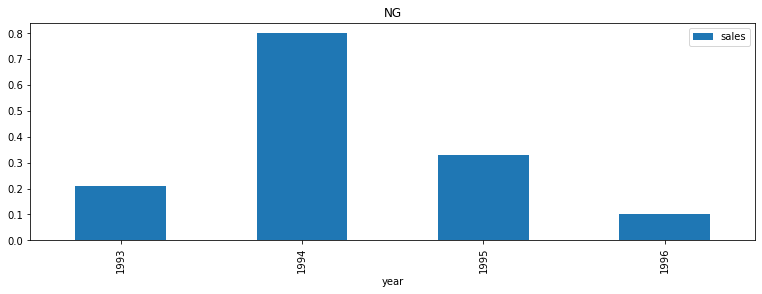

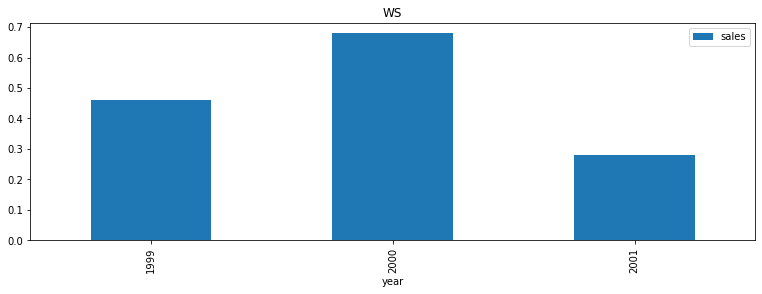

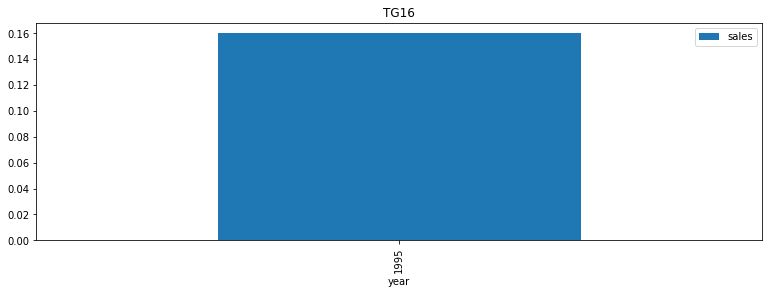

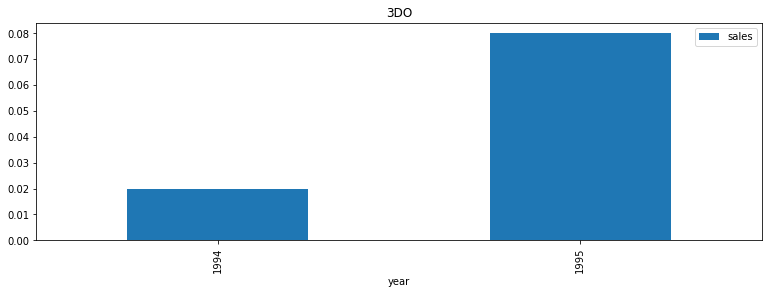

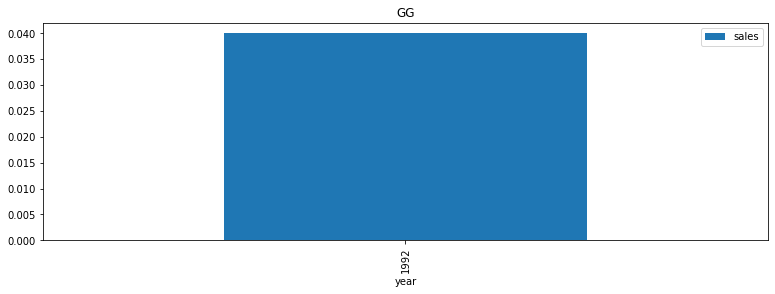

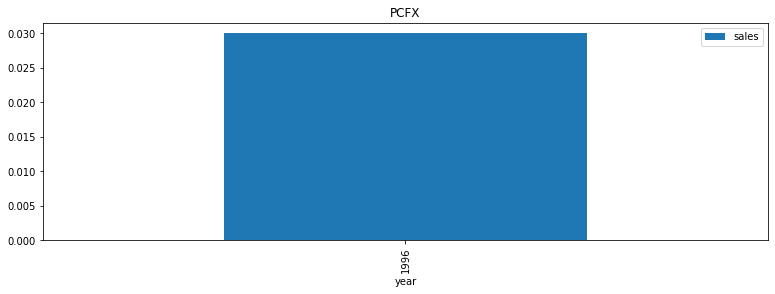

In [32]:
for platform in platforms_list:
    data[data['platform'] == platform].pivot_table(index='year', values='sales', aggfunc='sum').plot(
        kind='bar', figsize=(13,4))
    plt.title(platform);

<div><p>
Let's display 5 selling platforms</p></div> 

In [33]:
data.groupby('platform').agg({'name':'count'}).sort_values(by='name', ascending=False).head()

,name
platform,
PS2,2160
DS,2149
PS3,1331
Wii,1318
X360,1262


<div><p>
<br>- From the distribution diagrams, we can conclude that the average period of the 'life' of platforms lasts about 8 - 10 years.
<br>- The most games released on PS2.
<br>- From 2014 to 2015 growth in sales of the following platforms: PS4, XOne.
<br>- From 2014 to 2015, the sales of the following platforms fell: X360, PS3, PC, 3DS, WiiU, PSV, and Wii also has very small sales.
<br>- In 2015, the following platforms remained afloat: X360, PS3, Wii, PS4, PC, 3DS, XOne, WiiU, PSV.
<br>- Popular platforms: PS2, DS, PS3, Wii, X360.
    </p></div> 


<div><p>
From Fig. 1, we single out 3 stages in the development of the gaming industry: growth until 2008, the peak in 2008 and 2009, and the market decline.
In building a forecast for 2017, only those platforms that operate in 2016 will help.
The current period is only the latest generations of platforms, and we will also consider only
the final interval for the development of the gaming industry at the moment.
</p></div> 

In [34]:
actual_information = data[data['year'] > 2014]

In [35]:
actual_information.groupby('platform')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,17.0,0.617647,0.602625,0.15,0.2700,0.440,0.5200,2.53
3DS,140.0,0.315071,0.776995,0.01,0.0300,0.090,0.2325,7.14
DS,30.0,0.111333,0.159108,0.01,0.0200,0.060,0.1000,0.66
GB,1.0,1.030000,NaN,1.03,1.0300,1.030,1.0300,1.03
GBA,11.0,0.451818,0.692023,0.03,0.0650,0.180,0.5200,2.40
GC,14.0,0.157143,0.156914,0.01,0.0250,0.110,0.2875,0.53
N64,3.0,0.223333,0.097125,0.14,0.1700,0.200,0.2650,0.33
PC,121.0,0.144876,0.240777,0.01,0.0200,0.050,0.1900,1.62
PS,7.0,0.468571,0.556010,0.04,0.1250,0.180,0.6750,1.46


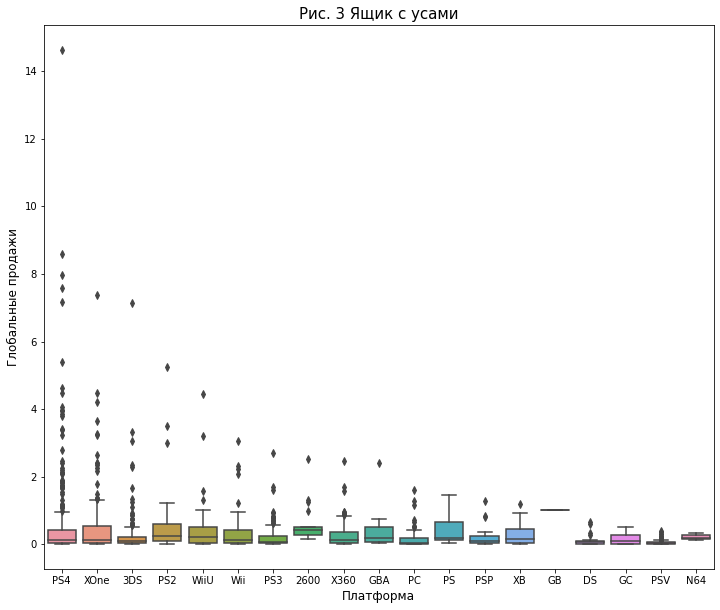

In [36]:
plt.figure(figsize=(12,10))
sns.boxplot(data=actual_information, x='platform', y='sales')
#plt.ylim(0, 1.5)
plt.title('Fig. 3 Drawer with mustache', fontsize=15)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global sales',fontsize=12);

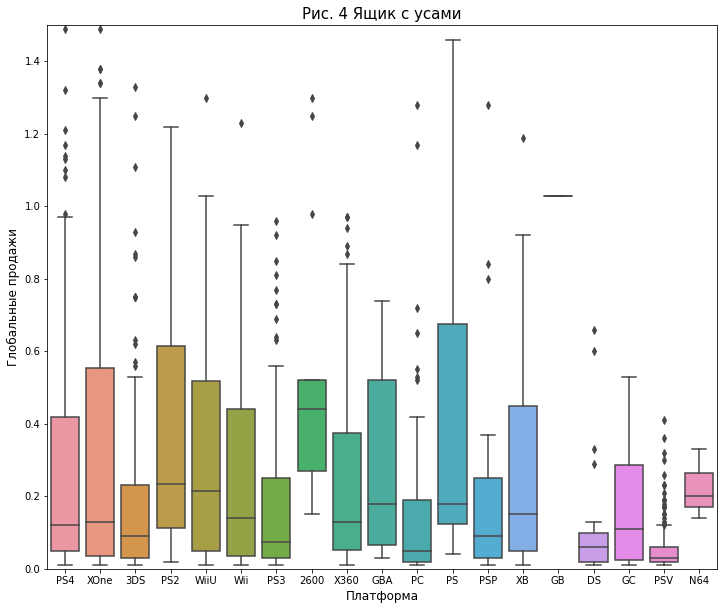

In [37]:
plt.figure(figsize=(12,10))
sns.boxplot(data=actual_information, x='platform', y='sales')
plt.ylim(0, 1.5)
plt.title('Fig. 4 Drawer with mustache', fontsize=15)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global sales',fontsize=12);

<div><p>
The median is different for everyone. 2600 has the most sales, followed by PS2, after WiiU, N64, PS, GBA and others.
</p></div> 

<div ><p>
Let's see how the reviews of users and critics affect sales within one popular platform.
</p></div> 

In [38]:
PS2 = actual_information[(actual_information['platform'] == 'PS2') 
                         & (actual_information['user_score'] != -1) & (actual_information['critic_score'] != -1)]
PS2['user_score'].corr(PS2['sales'])

0.03434626095477098

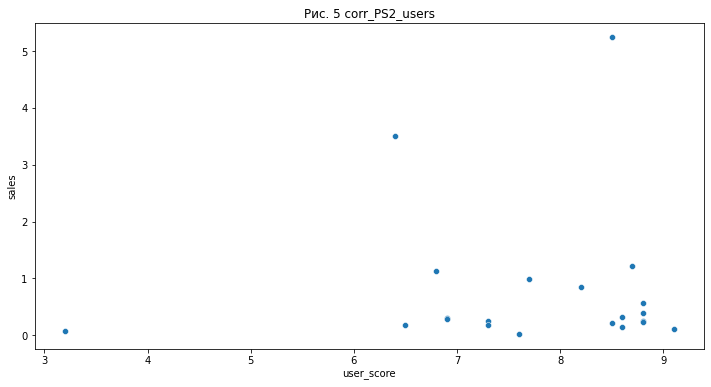

In [39]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='sales', data=PS2)
plt.title('Fig. 5 corr_PS2_users');

In [40]:
PS2['critic_score'].corr(PS2['sales'])

0.5627680003249758

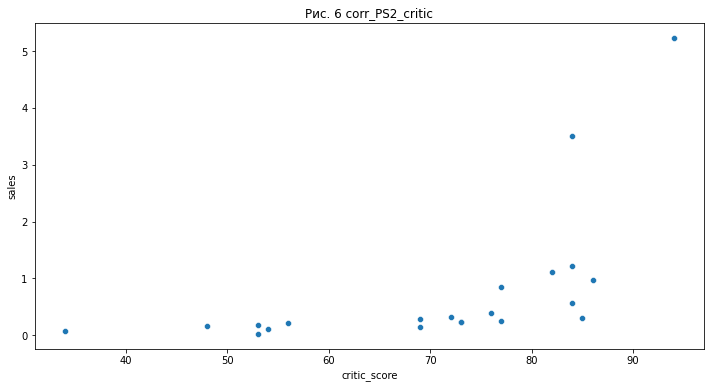

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='sales', data=PS2)
plt.title('Fig. 6 corr_PS2_critic');

In [42]:
 def corr_platform(name_of_platform):
        data_platform = actual_information[(actual_information['platform'] == name_of_platform) 
                                           & (actual_information['user_score'] != -1) 
                                           & (actual_information['critic_score'] != -1)]
        fig, ax = plt.subplots(1 ,2, figsize=(15,5))
        sns.scatterplot(x='critic_score', y='sales', data=data_platform, ax=ax[0])
        sns.scatterplot(x='user_score', y='sales', data=data_platform, ax=ax[1])
        fig.suptitle(name_of_platform, fontsize=15)
        ax[1].set(xlabel='User rating')
        ax[0].set(xlabel='Critics score')
        ax[1].set(ylabel='Number of sales')
        ax[0].set(ylabel='Number of sales')
        plt.show()
        
        critic_check = data_platform['critic_score'].corr(data_platform['sales'])
        user_check = data_platform['user_score'].corr(data_platform['sales'])
        
        if 0.3 >= critic_check >= 0.1:
            print('Correlation between critic reviews and gaming platform ',
                  name_of_platform.upper(), ': Weak', critic_check)
        if 0.5 >= critic_check >= 0.3:
            print('Correlation between critic reviews and gaming platform',
                  name_of_platform.upper(), ': Moderate', critic_check)
        if 0.7 >= critic_check >= 0.5:
            print('Correlation between critic reviews and gaming platform ',
                  name_of_platform.upper(), ': high', critic_check)
        if 0.9 >= critic_check >= 0.7:
            print('Correlation between critic reviews and gaming platform',
                  name_of_platform.upper(), ': Very high', critic_check)
        if 1 >= critic_check >= 0.9:
            print('Correlation between critic reviews and gaming platform ',
                  name_of_platform.upper(), ': Strong', critic_check)
        
        if 0.1 >= critic_check >= -0.1:
            print('Correlation between critic reviews and gaming platform',
                  name_of_platform.upper(), ': No correlation found', critic_check)
        if -0.1 >= critic_check >= -0.3:
            print('Correlation between critic reviews and gaming platform',
                  name_of_platform.upper(), ': Weak inverse', critic_check)
        if -0.3 >= critic_check >= -0.5:
            print('Correlation between critic reviews and gaming platform ',
                  name_of_platform.upper(), ': Moderate reverse', critic_check)
        if -0.5 >= critic_check >= -0.7:
            print('Correlation between critic reviews and gaming platform ',
                  name_of_platform.upper(), ': high reverse', critic_check)
        if -0.7 >= critic_check >= -0.9:
            print('Correlation between critic reviews and gaming platform',
                  name_of_platform.upper(), ': Very high return', critic_check)
        if -0.9 >= critic_check>= -1:
            print('Correlation between critic reviews and gaming platform',
                  name_of_platform.upper(), ': strong reverse', critic_check)
      
        if 0.3 >= user_check >= 0.1:
            print('Correlation between user reviews and sales',
                  name_of_platform.upper(), ': Weak', user_check)
        if 0.5 >= user_check >= 0.3:
            print('Correlation between user reviews and sales',
                  name_of_platform.upper(), ': Moderate', user_check)
        if 0.7 >= user_check >= 0.5:
            print('Correlation between user reviews and sales',
                  name_of_platform.upper(), ': high', user_check)
        if 0.9 >= user_check >= 0.7:
            print('Correlation between user reviews and sales',
                  name_of_platform.upper(), ': Very high', user_check)
        if 1 >= user_check >= 0.9:
            print('Correlation between user reviews and sales',
                  name_of_platform.upper(), ': strong', user_check)
 
        if 0.1 >= user_check >= -0.1:
            print('Correlation between user reviews and sales',
                  name_of_platform.upper(), ': No correlation found', user_check)
        if -0.1 >= user_check >= -0.3:
            print('Correlation between user reviews and sales',
                  name_of_platform.upper(), ': Weak inverse', user_check)
        if -0.3 >= user_check >= -0.5:
            print('Correlation between user reviews and sales',
                  name_of_platform.upper(), ': Moderate reverse', user_check)
        if -0.5 >= user_check >= -0.7:
            print('Correlation between user reviews and sales',
                  name_of_platform.upper(), ': high reverse', user_check)
        if -0.7 >= user_check >= -0.9:
            print('Correlation between user reviews and sales',
                  name_of_platform.upper(), ': Very high return', user_check)
        if -0.9 >= user_check >= -1:
            print('Correlation between user reviews and sales',
                  name_of_platform.upper(), ': strong reverse', user_check)
    

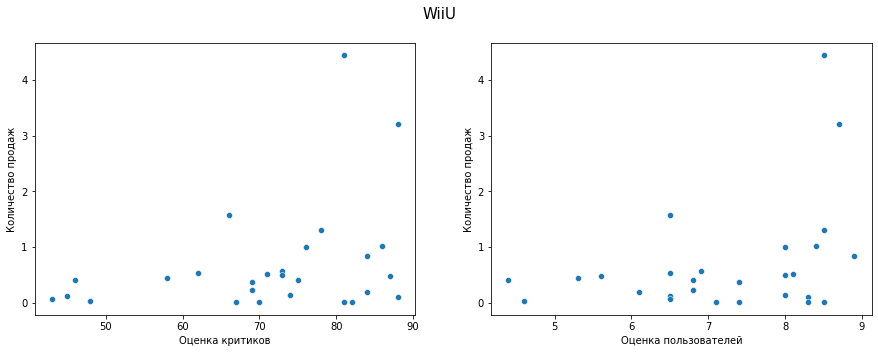

Корреляция между отзывами критиков и игровой платформой  WIIU : Умеренная 0.32567420650305284
Корреляция между отзывами пользователей и продажами  WIIU : Умеренная 0.3549869655260603


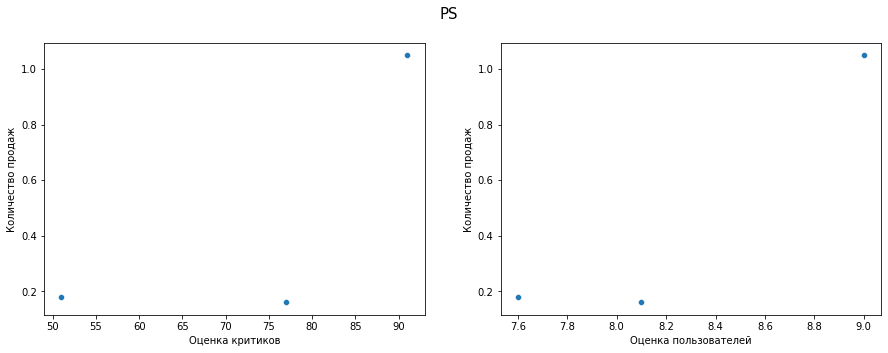

Корреляция между отзывами критиков и игровой платформой  PS : Весьма высокая 0.7552360271957191
Корреляция между отзывами пользователей и продажами  PS : Сильная 0.9287411522883134


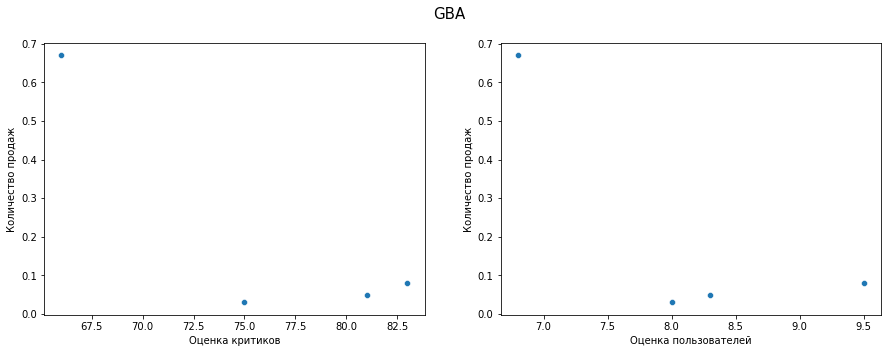

Корреляция между отзывами критиков и игровой платформой  GBA : Весьма высокая обратная -0.8660268634055596
Корреляция между отзывами пользователей и продажами  GBA : Весьма высокая обратная -0.7717744269630763


In [43]:
for platform in ['WiiU','PS', 'GBA']:
    corr_platform(platform);

<div><p>
<br>The PS2 has a high correlation between critical reviews and sales, in contrast to the correlation between user reviews and sales. The WiiU has a moderate relationship between critic and user ratings with sales. For PS and GBA, the correlation between reviews from critics and users with sales is high. The Wii and PS2 have not been linked. The N64 and 2600 platforms were not analyzed because they have markers = -1.


</p></div> 

<div class="alert alert-info" role="alert"><p>
Посмотрим на общее распределение игр по жанрам.
</p></div> 

In [44]:
actual_information.groupby('genre')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,493.0,0.263245,0.532294,0.01,0.0200,0.080,0.2400,4.62
Adventure,120.0,0.135333,0.338859,0.01,0.0200,0.030,0.0700,2.40
Fighting,49.0,0.351837,0.622327,0.01,0.0300,0.090,0.3300,3.00
Misc,100.0,0.263900,0.436975,0.01,0.0300,0.065,0.2875,2.47
Platform,38.0,0.302632,0.593595,0.01,0.0500,0.100,0.2400,3.21
Puzzle,18.0,0.188889,0.203842,0.01,0.0375,0.120,0.3000,0.74
Racing,65.0,0.246769,0.434699,0.01,0.0300,0.060,0.2500,2.42
Role-Playing,149.0,0.397987,0.973683,0.01,0.0400,0.110,0.3300,7.17
Shooter,108.0,1.081667,1.992048,0.01,0.0875,0.300,1.2425,14.63


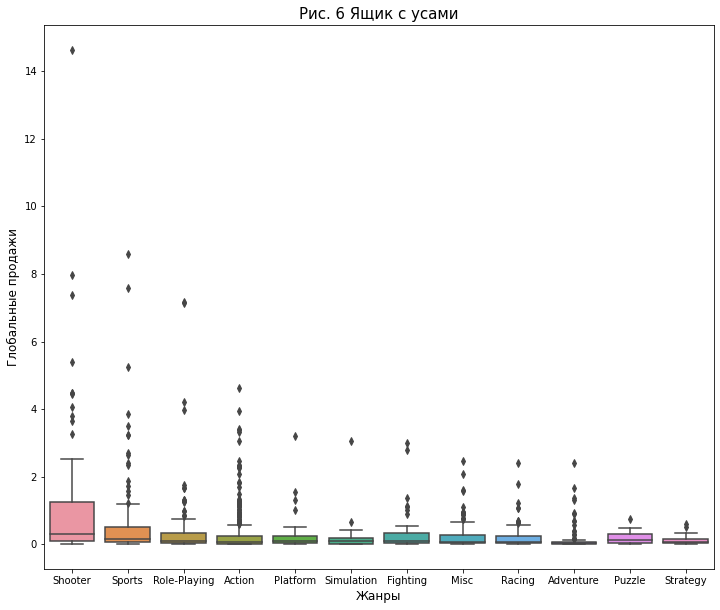

In [45]:
plt.figure(figsize=(12,10))
sns.boxplot(data=actual_information, x='genre', y='sales')
plt.title('Рис. 6 Ящик с усами', fontsize=15)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

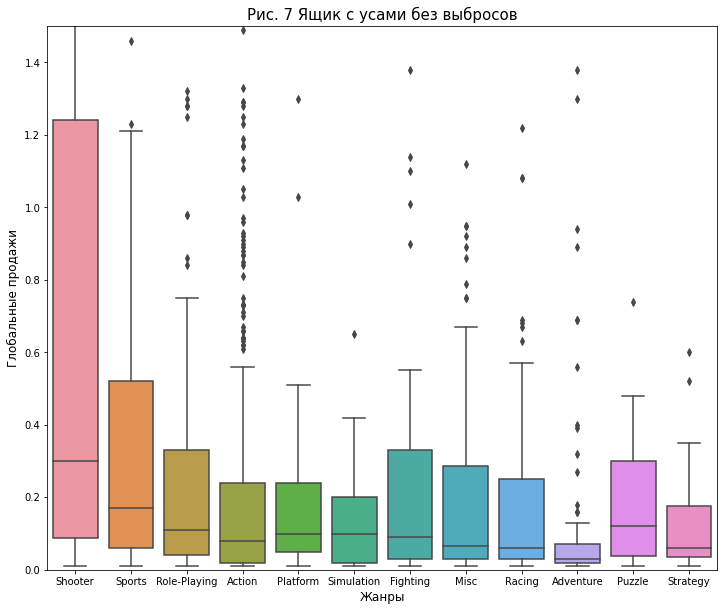

In [46]:
plt.figure(figsize=(12,10))
sns.boxplot(data=actual_information, x='genre', y='sales')
plt.ylim(0, 1.5)
plt.title('Рис. 7 Ящик с усами без выбросов', fontsize=15)
plt.xlabel('Жанры', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12);

<div class="alert alert-info" role="alert"><p><b>Исправленный вывод</b>
<br>Медианы всех жанров различаются. Самый популярный жанр компьютерных игр 'Shooter'. 'Adventure' расположены на последнем месте. 
</p></div> 

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />        
Стоит проанализировать прибыльность жанров на диаграмме размаха, сравнить медианные продажи на каждом жанре и проверить какая из них более стабильна и имеет более длинный ряд успешно продающихся игр
        
График нарисовать __в двух масштабах с выбросами и без__ (чтобы было видно 0.75-квантиль)

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /><b>Спасибо за замечание!</b>
<br /> Исправила вывод.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Что показывают нам две диаграммы размаха — кол-во выбросов, это игры, которые принесли максимум выручки. Т.е. можно платформы/жанры сравнить по кол-ву игр-рекордсменов, а значит определить, какая из них способна выпустить наиболее привлекательные для игроманов игры. Это про выбросы
        
Второй вид мы используем для того, чтобы сравнить медианные продажи по платформе/жанру, чтобы уточнить в каком кол-ве продаются игры, какая из них более стабильна в продажах...
        
        
Две хорошие статьи про диаграмму размаха
        
[Визуализация категориальных данных](https://pyprog.pro/sns/sns_7_categorical_data.html?)
        
[Исследуем отношение между переменными](https://dfedorov.spb.ru/pandas/downey/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D1%83%D0%B5%D0%BC%20%D0%BE%D1%82%D0%BD%D0%BE%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8.html?)

<div class="alert alert-info" role="alert"><a name="Вывод_по_исследовательскому_анализу_данных"><h2>Вывод по исследовательскому анализу данных</h2></a></div>
<div class="alert alert-info" role="alert">
<br>- C начала 90-х годов количество игр начинает ежегодно расти быстрыми темпами. 
<br>- Средний период 'жизни' платформ длится около 8 - 10 лет.
<br>- Популярные платформы: 2600, PS2, WiiU, N64, PS, GBA.
<br>- С 2014 года по 2015 год рост в продажах у следующих платформ: PS4, XOne. 
<br>- С 2014 года по 2015 год упали в продажах следующие платформы: X360, PS3, PC, 3DS, WiiU, PSV, также очень маленькие продажи у Wii.
<br>- В 2015 году на плаву остались следующие платформы: X360, PS3, Wii, PS4, PC, 3DS, XOne, WiiU, PSV.
<br>- У PS2 корреляция между отзывами критиков и продажами - высокая, в отличии от корреляция между отзывами пользователей и продаж. У WiiU наблюдается умеренная связь между оценками критиков и пользователей с продажами.  У PS и GBA корреляция между отзывами критиков и пользователей c продажами - высокая. У Wii и PS2 связь не выявлена. Платформы N64 и 2600 не были проанализированы, т.к. у них наблюдаются маркеры = -1. 
<br> - Самый популярный жанр компьютерных игр 'Shooter'. 
<br> -'Adventure' расположены на последнем месте.</div> 


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Промежуточные выводы отлично помогают составить итоговый и не упустить детали на проекте, молодец
        
стоит поправить нюансы

<div class="alert alert-info" role="alert"><a name="Портрет_пользователя_каждого_региона"><h2>Портрет пользователя каждого региона</h2></a></div>

<div class="alert alert-info" role="alert"><p>
Самые популярные платформы для каждого региона.
</p></div> 

In [47]:
na_sales_platform = actual_information.pivot_table(
    index='platform', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).head()
na_sales_platform 

,platform,na_sales
11,PS4,63.86
18,XOne,50.30
16,X360,14.78
1,3DS,11.15
9,PS2,10.92


In [48]:
eu_sales_platform = actual_information.pivot_table(
    index='platform', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).head()
eu_sales_platform

,platform,eu_sales
11,PS4,83.54
18,XOne,28.10
7,PC,11.17
10,PS3,10.38
1,3DS,7.60


In [49]:
jp_sales_platform = actual_information.pivot_table(
    index='platform', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).head()
jp_sales_platform

,platform,jp_sales
1,3DS,23.60
11,PS4,12.05
13,PSV,8.48
10,PS3,5.75
15,WiiU,4.12


In [50]:
other_sales_platform = actual_information.pivot_table(
    index='platform', values='other_sales', aggfunc='sum').reset_index().sort_values(by='other_sales', ascending=False).head()
other_sales_platform

,platform,other_sales
11,PS4,28.70
18,XOne,7.71
10,PS3,3.58
9,PS2,2.97
16,X360,2.10


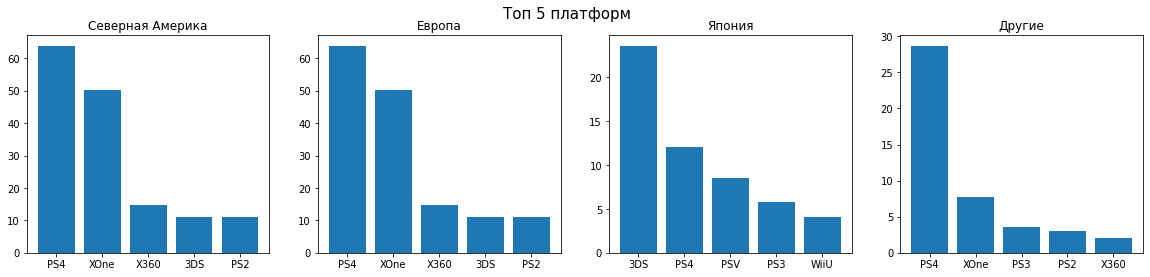

In [51]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
fig.suptitle('Топ 5 платформ', fontsize=15);
axes[0].bar(na_sales_platform['platform'], na_sales_platform['na_sales'])
axes[0].set_title("Северная Америка")
axes[1].bar(na_sales_platform['platform'], na_sales_platform['na_sales'])
axes[1].set_title("Европа")
axes[2].bar(jp_sales_platform['platform'], jp_sales_platform['jp_sales'])
axes[2].set_title("Япония")
axes[3].bar(other_sales_platform['platform'], other_sales_platform['other_sales'])
axes[3].set_title("Другие");


<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит поправить ширину графиков, надписи не читаются
        
        во всем разделе

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /><b>Спасибо за замечание!</b>
<br /> Поправила графики.

<div class="alert alert-info" role="alert"><p><b>Исправленный вывод в2</b>
<br> PS4 - самая популярная платформа в мире, однако в Японии на первом месте 3DS. XOne занимает второе место по популярности в Северной Америке, Европе и других странах, а в Японии PS4 занимает второе место по платформам.
</p></div> 

<div class="alert alert-info" role="alert"><p>
Самые популярные жанры для каждого региона.
</p></div> 

In [52]:
na_sales_genre = actual_information.pivot_table(
    index='genre', values='na_sales', aggfunc='sum').reset_index().sort_values(by='na_sales', ascending=False).head()
na_sales_genre

,genre,na_sales
8,Shooter,55.59
0,Action,49.52
10,Sports,39.54
7,Role-Playing,20.59
3,Misc,13.28


In [53]:
eu_sales_genre = actual_information.pivot_table(
    index='genre', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).head()
eu_sales_genre

,genre,eu_sales
8,Shooter,43.10
0,Action,42.96
10,Sports,33.28
7,Role-Playing,17.68
6,Racing,8.54


In [54]:
jp_sales_genre = actual_information.pivot_table(
    index='genre', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).head()
jp_sales_genre

,genre,jp_sales
0,Action,24.34
7,Role-Playing,15.43
3,Misc,4.28
8,Shooter,3.87
1,Adventure,2.28


In [55]:
other_sales_genre = actual_information.pivot_table(
    index='genre', values='other_sales', aggfunc='sum').reset_index().sort_values(by='other_sales', ascending=False).head()
other_sales_genre

,genre,other_sales
8,Shooter,14.26
0,Action,12.96
10,Sports,10.85
7,Role-Playing,5.60
3,Misc,2.43


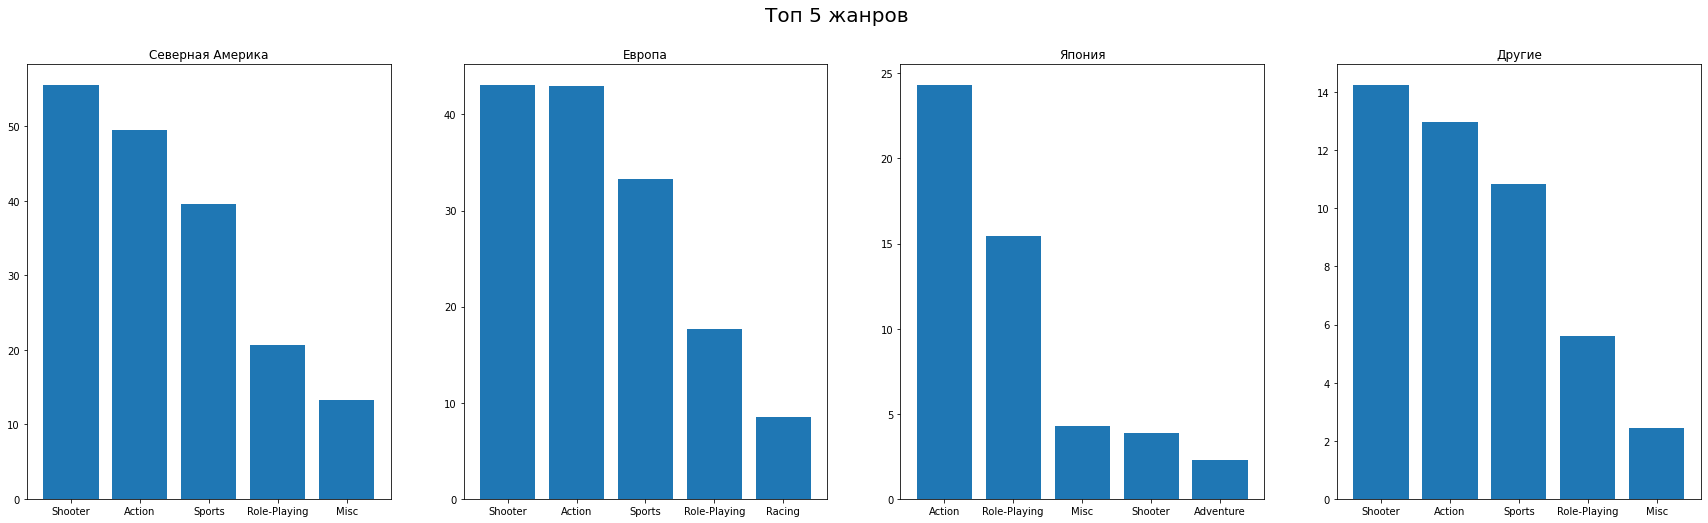

In [56]:
fig, axes = plt.subplots(1, 4, figsize=(30, 8))
fig.suptitle('Топ 5 жанров', fontsize=20);
axes[0].bar(na_sales_genre['genre'], na_sales_genre['na_sales'])
axes[0].set_title("Северная Америка")
axes[1].bar(eu_sales_genre['genre'], eu_sales_genre['eu_sales'])
axes[1].set_title("Европа")
axes[2].bar(jp_sales_genre['genre'], jp_sales_genre['jp_sales'])
axes[2].set_title("Япония")
axes[3].bar(other_sales_genre['genre'], other_sales_genre['other_sales'])
axes[3].set_title("Другие");


<div class="alert alert-info" role="alert"><p><b>Исправленный вывод</b>
    <br> Shooter - самый популярный жанр в Северной Америке, Европе и других странах. Action занимает первое место в Японии и второе место в Северной Америке, Европе и других странах.
</p></div>

<div class="alert alert-d anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Портреты клиентов рассчитаны, молодец, значительное влияние на портрет оказывает период с 2009 г. ..., можем совершить ошибку при формировании рекомендации маркетологам
        
Стоит оформить графики раздела TOП-5:

+ выбрать актуальный период;
+ для каждого ТОП-5 - построить 3 графика рядом с помощью subplots, оптимальнее сравнивать три региона по каждому виду портрета вместе;
+ оформить "двухуровневый заголовок" - и у всех трех графиков вместе, и у каждого из трех по отдельности;
+ при анализе платформ и жанров стоит все, что не вошло в ТОП-5, объединять в категорию "другие" - так картина анализа будет более полной

        
Если столкнешься с трудностью выполнения данного пункта — присылай код, который не получился и вопрос, подумаем вместе
        
https://proproprogs.ru/modules/matplotlib-otobrazhenie-neskolkih-koordinatnyh-osey-v-odnom-okne
        
https://nagornyy.me/it/vizualizatsiia-dannykh-v-matplotlib/?ysclid=l4q3l4q0p8940570437
    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html?highlight=append#pandas.DataFrame.append

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /><b>Спасибо за замечание!</b>
<br /> Выбрала актуальный период за последние 3 года. Для каждого ТОП-5 - построила 3 графика рядом с помощью subplots. Исправила вывод.

<div class="alert alert-info" role="alert"><p>
Влияет ли рейтинг ESRB на продажи в отдельном регионе?
</p></div> 

In [57]:
# check
actual_information.rating.value_counts()

RP      603
T       248
E       222
M       176
E10+    128
Name: rating, dtype: int64

In [58]:
na_sales_rating = actual_information.pivot_table(
    index='rating', values='na_sales', aggfunc='sum').reset_index().sort_values(by='rating', ascending=False).head()
na_sales_rating

,rating,na_sales
4,T,35.01
3,RP,52.28
2,M,52.62
1,E10+,25.69
0,E,45.34


In [59]:
eu_sales_rating = actual_information.pivot_table(
    index='rating', values='eu_sales', aggfunc='sum').reset_index().sort_values(by='eu_sales', ascending=False).head()
eu_sales_rating

,rating,eu_sales
2,M,49.51
0,E,41.21
3,RP,39.41
4,T,25.56
1,E10+,16.71


In [60]:
jp_sales_rating = actual_information.pivot_table(
    index='rating', values='jp_sales', aggfunc='sum').reset_index().sort_values(by='jp_sales', ascending=False).head()
jp_sales_rating

,rating,jp_sales
3,RP,38.08
4,T,8.40
0,E,5.40
2,M,4.95
1,E10+,3.27


In [61]:
other_sales_rating = actual_information.pivot_table(
    index='rating', values='other_sales', aggfunc='sum').reset_index().sort_values(by='other_sales', ascending=False).head()
other_sales_rating

,rating,other_sales
2,M,15.28
3,RP,12.26
0,E,11.20
4,T,9.03
1,E10+,5.63


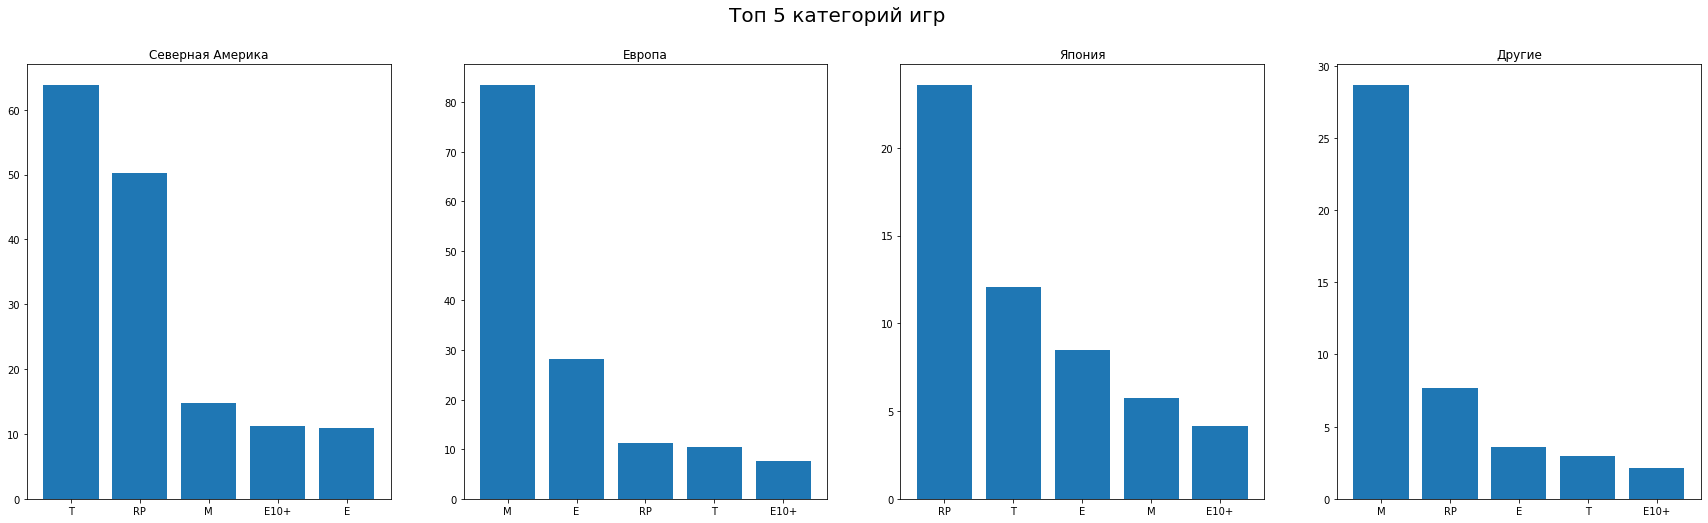

In [62]:
fig, axes = plt.subplots(1, 4, figsize=(30, 8))
fig.suptitle('Топ 5 категорий игр', fontsize=20);
axes[0].bar(na_sales_rating['rating'], na_sales_platform['na_sales'])
axes[0].set_title("Северная Америка")
axes[1].bar(eu_sales_rating['rating'], eu_sales_platform['eu_sales'])
plt.title("Европа")
axes[1].set_title("Европа")
axes[2].bar(jp_sales_rating['rating'], jp_sales_platform['jp_sales'])
axes[2].set_title("Япония")
axes[3].bar(other_sales_rating['rating'], other_sales_platform['other_sales'])
axes[3].set_title("Другие");


<div class="alert alert-info" role="alert"><p><b>Исправленный вывод в2</b>
<br> Категория "М" занимаем первое место в Европе и других странах. Категория "Т" популярна в Северной Америке,а в Японии категория "RP". 
</p></div>

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
При твоем способе подсчета игры без рейтинга оказываются полностью исключенными из анализа. Но продажи именно этих игр могут указать на ключевое различие в регионах
        
Стоит поправить исследование

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /><b>Спасибо за замечание!</b>
<br /> Поправила исследование и исправила вывод.

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит вернуться к выводу после восставления записей

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /><b>Спасибо за замечание!</b>
<br /> Поправила исследование и исправила вывод.

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Заполнение пропусков в рейтинге позволило определить отличия региональных рынков, молодец

<div class="alert alert-info" role="alert"><a name="Вывод_по_портрету_пользователя_каждого_региона"><h2>Вывод по портрету пользователя каждого региона в2</h2></a></div>
<div class="alert alert-info" role="alert">
<br>- PS4 - самая популярная платформа в мире, однако в Японии на первом месте 3DS. XOne занимает второе место по популярности в Северной Америке, Европе и других странах, а в Японии PS4 занимает второе место по платформам.
<br>- Shooter - самый популярный жанр в Северной Америке, Европе и других странах. Action занимает первое место в Японии и второе место в Северной Америке, Европе и других странах.
<br>- Категория "М" занимаем первое место в Европе и других странах. Категория "Т" популярна в Северной Америке,а в Японии категория "RP". </div> 

<div class="alert alert-info" role="alert"><a name="Проверка_гипотез"><h2>Проверка гипотез</h2></a></div>

<div class="alert alert-info" role="alert"><p>
Гипотеза №1.
<br>𝐻0  — средние пользовательские рейтинги платформ Xbox One и PC равны.
<br>𝐻1  — средние пользовательские рейтинги платформ Xbox One и PC различаются.
</p></div>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> Гипотезы сформулированы верно, для акцентирования можно использовать в нулевой гипотезе слово равны

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /><b>Спасибо за замечание!</b>
<br /> Поправила гипотезу.

In [63]:
new_data = actual_information[(actual_information['user_score'] != -1) & (actual_information['critic_score'] != -1)]

In [64]:
xone = new_data.query('platform == "XOne"')['user_score']
pc = new_data.query('platform == "PC"')['user_score']

alpha = .01

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5247288093601634
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info" role="alert"><p>
Статистический тест показал, что гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC не получилось отвергнуть. Если бы мы утверждали, что средние рейтинги для этих платформ различаются, мы бы допустили ошибку с вероятностью 52%.
</p></div>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Важно удалить пропуски и «заглушки» перед проведением теста, молодец

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />
Стоит выравнивать периоды использования платформ, одна из приставок вышла на рынок совсем недавно ...

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /><b>Спасибо за замечание!</b>
<br /> Поправила исследование.

<div class="alert alert-info" role="alert"><p>
Гипотеза №2.
<br>𝐻0  — средние пользовательские рейтинги жанров Action и Sports равны.
<br>𝐻1  — средние пользовательские рейтинги жанров Action и Sports различаются.
</p></div>

In [65]:
action = new_data.query('genre == "Action"')['user_score']
sports = new_data.query('genre == "Sports"')['user_score']

alpha = .01

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0035877365743380383
Отвергаем нулевую гипотезу


<div class="alert alert-info" role="alert"><p>
Исходная гипотеза не подтвердилась: средние пользовательские рейтинги жанров Action и Sports различаются. 
</p></div>

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> приведена классическая расшифровка значения р, молодец

<div class="alert alert-info" role="alert"><p>
Исходя из H₀ cформулировала альтернативную гипотезы H₁. Это утверждение, которое принимается верным, если отбрасывается H₀. Оно может звучать так: «среднее генеральной совокупности не равно A». 
</p></div>

<div class="alert alert-info" role="alert"><p>
Для проверки гипотез выбрала scipy.stats.ttest_ind (array1, array2, equal_var), 
т.к. это специальный метод о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.</p></div>


<div class="alert alert-info" role="alert"><p><a name="Вывод_по_проверке_гипотез"><h2>Вывод по проверке гипотез</h2></a>
<br> 
    <ul>
     <li>Статистический тест показал, что гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC не получилось отвергнуть. Если бы мы утверждали, что средние рейтинги для этих платформ различаются, мы бы допустили ошибку с вероятностью 52%.</li>
     <li>Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports не подтвердилась: средние пользовательские рейтинги жанров Action и Sports различаются. 
</li
     </ul>
</p></div> 

<div class="alert alert-danger">
<font size="4"><b>❌ Комментарий ревьюера в3</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 
можно подправить некоторые моменты
        
        Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports не подтвердилась: средние пользовательские рейтинги жанров Action и Sports различаются.

<b>Из теории на тренажере</b>
        
Формулирование двусторонних гипотез. <br>
        
<b>Никакие экспериментально полученные данные никогда не подтвердят какую-либо гипотезу. Это наше фундаментальное ограничение. </b>Данные могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае нет оснований утверждать, что выдвинутая гипотеза доказана.
Допустим, данные гипотезе не противоречат, тогда мы её не отвергаем. Если же мы приходим к выводу, что получить такие данные в рамках этой гипотезы вряд ли возможно, у нас появляется основание отбросить эту гипотезу.
        
https://allatambov.github.io/psms/pdf/hypo-test.pdf


<div class="alert alert-info" role="alert"><a name="Общий_вывод"><h2>Общий вывод</h2></a></div>

<div class="alert alert-info" role="alert">
<br />Было проведено исследование, чтобы выявить влияние пользовательских рейтингов для жанров Action и Sports и платформ Xbox One и PC. Входные данные - исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Перед проведением исследования были поставлены две гипотезы:
        <ul>
     <li>Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC равны.</li>
     <li>Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports равны.</li>
       </ul>
    
<br />В результате удалось выявить зависимости.
         <br />Гипотеза 1 отвергнута:
        <ul>
     <li> Статистический тест показал, что гипотезу о равенстве средних пользовательских рейтингов платформ XOne и PC не получилось отвергнуть. </li>
     <li> Если бы мы утверждали, что средние рейтинги для этих платформ различаются, мы бы допустили ошибку с вероятностью 52%. </li>
       </ul>
         <br />Гипотеза 2 подтверждена:</b>
        <ul>
     <li>Гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports не подтвердилась: средние пользовательские рейтинги жанров Action и Sports различаются. </li>
       </ul>    
<p><br>- C начала 90-х годов количество игр начинает ежегодно расти быстрыми темпами. 
<br>- Средний период 'жизни' платформ длится около 8 - 10 лет.
<br>- Популярные платформы: 2600, PS2, WiiU, N64, PS, GBA.
<br>- С 2014 года по 2015 год рост в продажах у следующих платформ: PS4, XOne. 
<br>- С 2014 года по 2015 год упали в продажах следующие платформы: X360, PS3, PC, 3DS, WiiU, PSV, также очень маленькие продажи у Wii.
<br>- В 2015 году на плаву остались следующие платформы: X360, PS3, Wii, PS4, PC, 3DS, XOne, WiiU, PSV.
<br>- У PS2 корреляция между отзывами критиков и продажами - высокая, в отличии от корреляция между отзывами пользователей и продаж. У WiiU наблюдается умеренная связь между оценками критиков и пользователей с продажами.  У PS и GBA корреляция между отзывами критиков и пользователей c продажами - высокая. У Wii и PS2 связь не выявлена. Платформы N64 и 2600 не были проанализированы, т.к. у них наблюдаются маркеры = -1. 
<br> - Самый популярный жанр компьютерных игр 'Shooter'. 
<br> -'Adventure' расположены на последнем месте.
<br>- PS4 - самая популярная платформа в мире, однако в Японии на первом месте 3DS. XOne занимает второе место по популярности в Северной Америке, Европе и других странах, а в Японии PS4 занимает второе место по платформам.
<br>- Shooter - самый популярный жанр в Северной Америке, Европе и других странах. Action занимает первое место в Японии и второе место в Северной Америке, Европе и других странах.
<br>- Категория "М" занимаем первое место в Европе и других странах. Категория "Т" популярна в Северной Америке,а в Японии категория "RP". 
</p> </div>
 

<div class="alert alert-da nger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Итоговый вывод технически составлен грамотно
        
стоит перепроверить результаты после определения актуального периода и исправления всех комментариев, можно обновить названия самых актуальных платформ, жанров и рейтингов, какую долю они занимают на исследуемых рынках
        

<div class="alert alert-info">
<font size="4", color = "black"><b>✍ Комментарий студента</b></font>
    <br /> 
    <font size="3", color = "black">
<br /><b>Спасибо за замечание!</b>
<br /> Поправила вывод.

<div class="alert alert-success">
<font size="5", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />   
Ты выполнила практически все пункты проекта, молодец! Проведен значительный объем исследования 
        
Критические ❌ комментарии связаны с неточностями: 

 + удаление половины выборки
 + сократить категории в рейтингах ESRB — на твое усмотрение
 + самое важное — переопределить актуальный период
 + исправить диаграмму размаха для анализа продаж на актуальных платформах
 + исправить исследование зависимости по платформам конкурентам (от оценок критиков и пользователей)        
 + оценить прибыльность жанров на диаграмме размаха
 + построить графики в ТОП-5 и пересмотреть раздел рейтингов
 + в разделе проверки гипотез подправить выборки 
 + перепроверить промежуточные и итоговый выводы после всех исправлений

Стоит обратить внимание на ⚠️ комментарии...        
        
Если будут вопросы про мои комментарии - задавай, если какой-то формат взаимодействия не устраивает или есть какие-то другие пожелания - пиши :)

<div class="alert alert-success">
    <font size="5", color= "seagreen"><b>Жду твой проект и твои комментарии 🤝</b></font><br />

<div style="border:solid steelblue 3px; padding: 20px">
<font size="4">🍕<b> Комментарий ревьюера</b></font>
<br /> 
<font size="3", color = "black">
<br />
Может пригодиться  
    
[Подборка статей о работе с библиотеками для анализа данных на языке Python](https://dfedorov.spb.ru/pandas/)
    
   
[Визуализация](https://dfedorov.spb.ru/pandas/%D0%AD%D1%84%D1%84%D0%B5%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B5%20%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20Matplotlib.html)


[Искусство статистики](https://www.mann-ivanov-ferber.ru/books/iskusstvo-statistiki/)
        
[Постер «Графики, которые убеждают всех»](https://www.notion.so/6c5ae8ceb8b5411e907c93c9b5e6a44e)        
        
        
В помощь — как реализовать интерактивный план проекта вручную (для собственных проектов), смотри по <a href="https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704">ссылке</a>
    
пара ссылок и по разделам проекта можно будет переходить без пролистывания всего кода, особенно актуально на проектах длина которых >  10 страниц (и там где не установлен плагин TOC)      

## Бонус

In [66]:
data_games = pd.read_csv('/datasets/games.csv')

In [67]:
data_games.columns = map(str.lower, data_games.columns)

In [68]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [69]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [70]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [71]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [72]:
# check
# круги + категория другие
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    sales = (
            sales.append({'platform': 'Other', region: df[region].sum() 
                       - sales[region].sum()}, ignore_index= True)
         )
    
    
    sales.columns = ['platform', 'sales']
      
    labels_c=sales.platform
    colours = {'Wii':'C0', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'steelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'C14', '2600':'C15', 'PSP':'C16', 
               'XOne':'C17',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",
               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

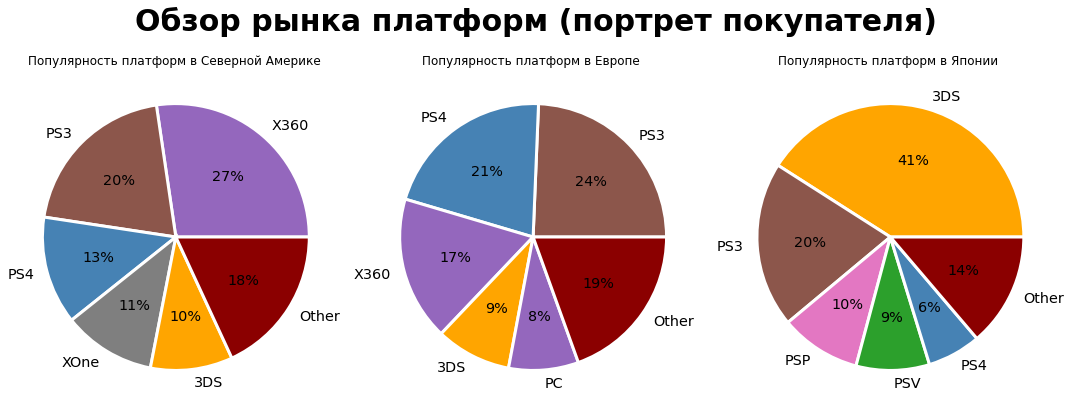

In [73]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2011

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

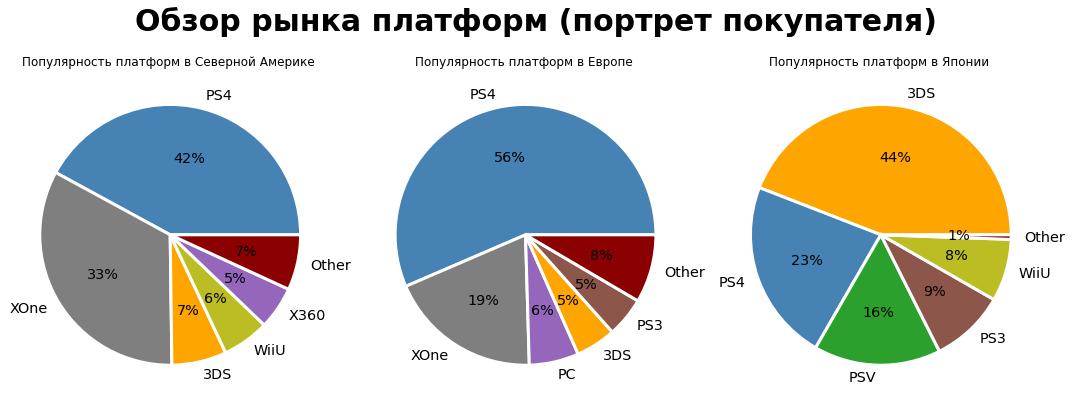

In [74]:
# check
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

x_year = 2015

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера в2</b></font>
    <br /> 
    <font size="3", color = "black">
<br /> 2015 год взят для акцентирования на изменении доли в продажах современных платформ